In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import  pyplot as plt

In [10]:
test=pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')
train=pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [12]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [14]:
# Handle the missing columns of train
train.drop(columns=['Cabin'], inplace=True)
train["Age"].fillna(train['Age'].mean(), inplace=True)

# Handle the missing columns of test
test.drop(columns=['Cabin'], inplace=True)
test["Age"].fillna(test['Age'].mean(), inplace=True)
test["Fare"].fillna(test['Fare'].mean(), inplace=True)

In [15]:
train['Embarked'].value_counts()
train['Embarked'].fillna('S', inplace=True)

In [16]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [17]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [18]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# train['Survived']=train['Survived'].astype('category')
# train['Pclass']=train['Pclass'].astype('category')
# train['Sex']=train['Sex'].astype('category')
# train['Age']=train['Age'].astype('category')
# train['Embarked']=train['Embarked'].astype('category')

# test['Pclass']=test['Pclass'].astype('category')
# test['Sex']=test['Sex'].astype('category')
# test['Age']=test['Age'].astype('category')
# test['Embarked']=test['Embarked'].astype('category')


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 32.7+ KB


# Univariate Analysis

out of 891 62% people died in the accident


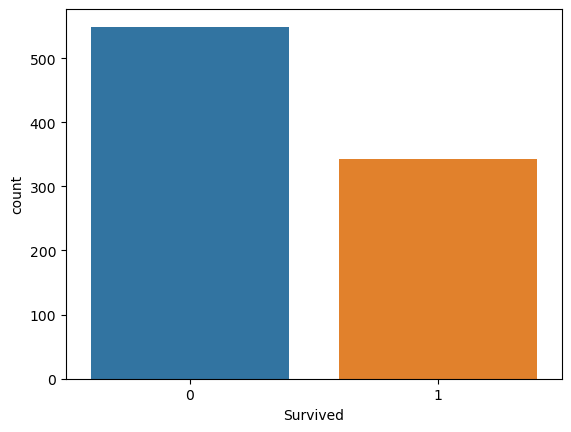

In [21]:
sns.countplot(x=train['Survived'], data=train)
death_percent=round((train['Survived'].value_counts().values[0]/891)*100)
print("out of 891 {}% people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


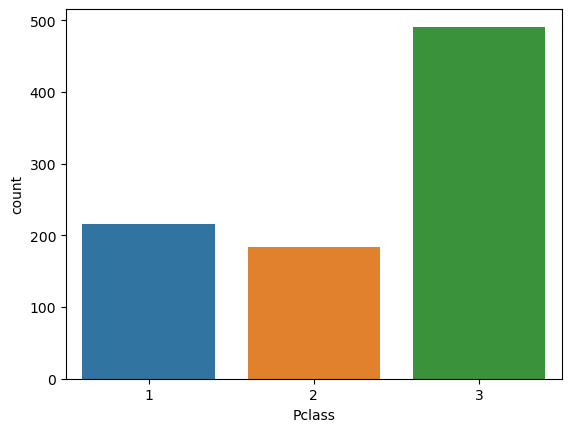

In [22]:
sns.countplot(x=train['Pclass'], data=train)
print((train['Pclass'].value_counts()/891)*100)


male      64.758698
female    35.241302
Name: Sex, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

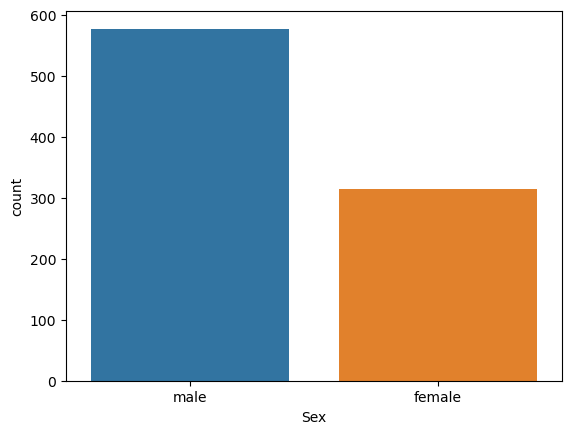

In [23]:
print((train['Sex'].value_counts()/891)*100)
sns.countplot(x=train['Sex'], data=train)

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

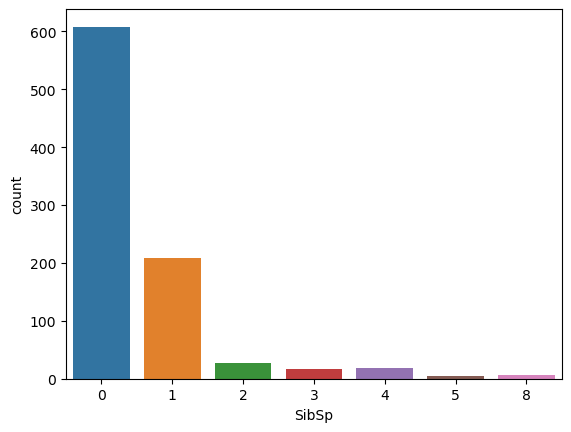

In [24]:
print((train['SibSp'].value_counts()/891)*100)
sns.countplot(x=train['SibSp'], data=train)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

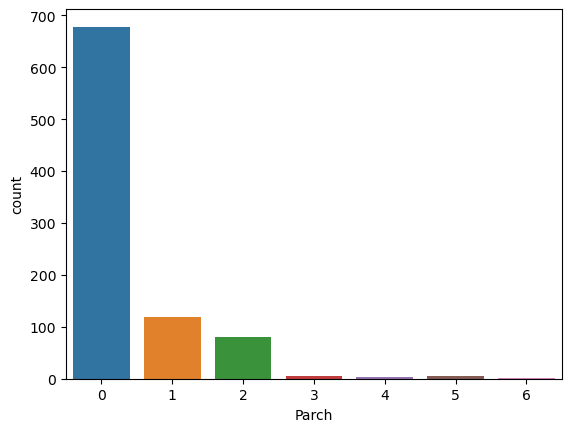

In [25]:
print((train['Parch'].value_counts()/891)*100)
sns.countplot(x=train['Parch'], data=train)

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

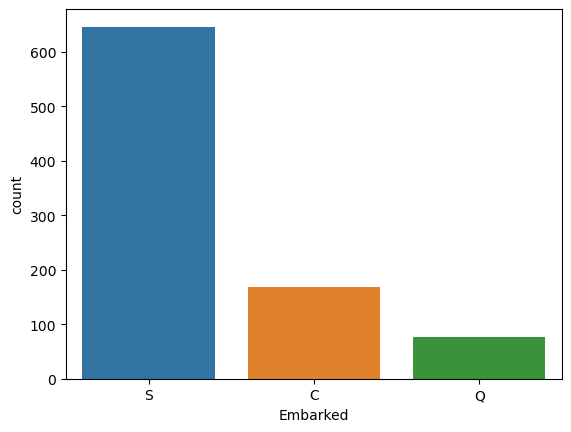

In [26]:
print((train['Embarked'].value_counts()/891)*100)
sns.countplot(x=train['Embarked'], data=train)

#### Outlier Detection

0.4344880940129925
0.9662793026645233


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


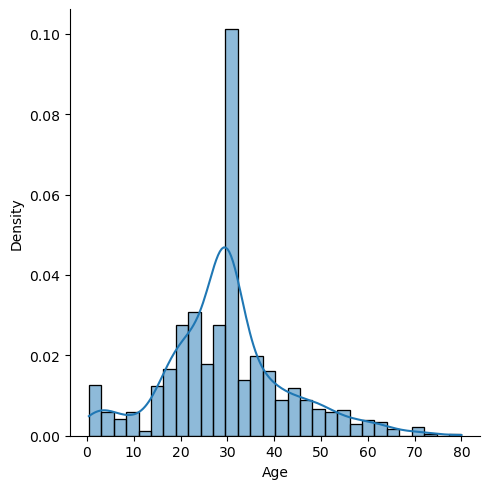

In [27]:
sns.displot(x=train['Age'], kde=True, stat='density' )
print(train['Age'].skew())
print(train['Age'].kurt())

<Axes: xlabel='Age'>

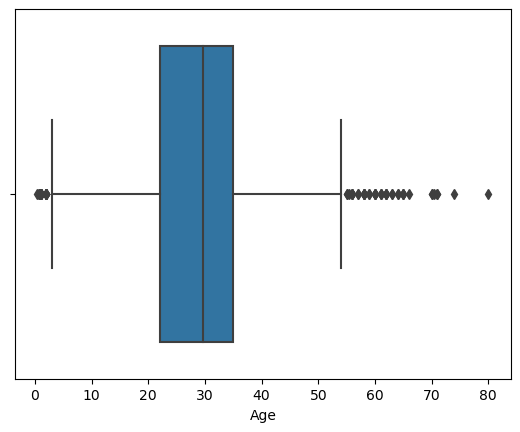

In [28]:
sns.boxplot(x=train['Age'])

In [29]:
print("people with  age in between 60 and 70 are", train[(train['Age']>60) & (train['Age']>70)].shape[0])
print("people with  age in between 70 and 75 are", train[(train['Age']>=70) & (train['Age']<=75)].shape[0])
print("people with  age above 75 are", train[(train['Age']>75)].shape[0])
print('*'*100)

print("people with  age in between 0 and 1 are", train[(train['Age']<1)].shape[0])

people with  age in between 60 and 70 are 5
people with  age in between 70 and 75 are 6
people with  age above 75 are 1
****************************************************************************************************
people with  age in between 0 and 1 are 7


#### Conclusion
**1- Deeper analysis is required for outlier detection**

<Axes: xlabel='Fare', ylabel='Density'>

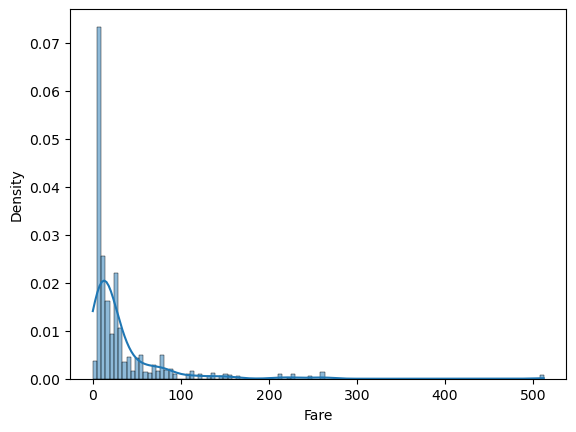

In [30]:
# Fare Column

sns.histplot(train['Fare'], kde=True, stat='density')

In [31]:
print("people with Fare in between 200$ and 300$ are", train[(train['Fare']>200) & (train['Fare']<300)].shape[0])
print("people with  Fare above 300$ are", train[(train['Fare']>300)].shape[0])

people with Fare in between 200$ and 300$ are 17
people with  Fare above 300$ are 3


#### Conclusion
**1- Highly skewed data, lot of people had cheaper tickets**

**2- Outliers are there in data**

# Multivariate Analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


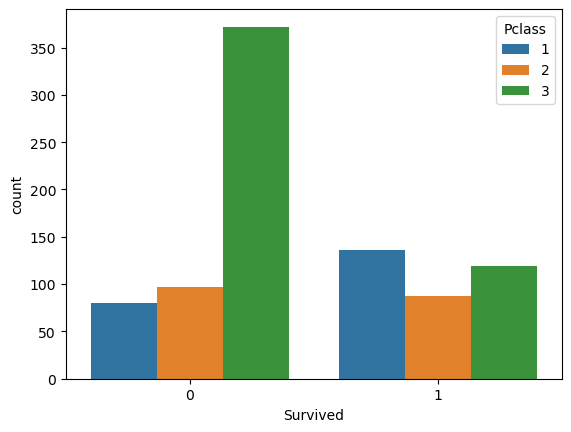

In [32]:
# Survival with Pclass

sns.countplot(x=train['Survived'],hue=train['Pclass'])
pd.crosstab(train['Pclass'],train['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


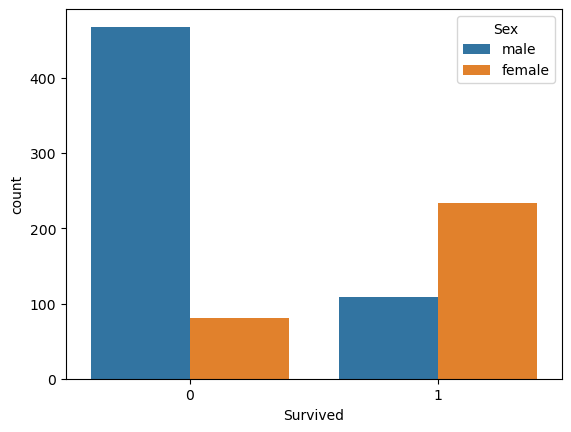

In [33]:
# Survival with Sex

sns.countplot(x=train['Survived'],hue=train['Sex'])
pd.crosstab(train['Sex'],train['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


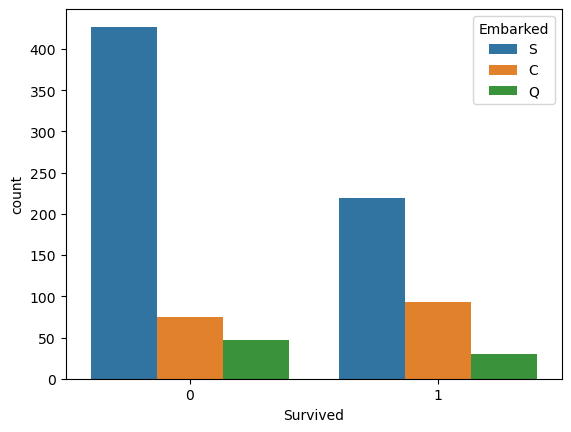

In [34]:
# Survival with Embarked

sns.countplot(x=train['Survived'],hue=train['Embarked'])
pd.crosstab(train['Embarked'],train['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

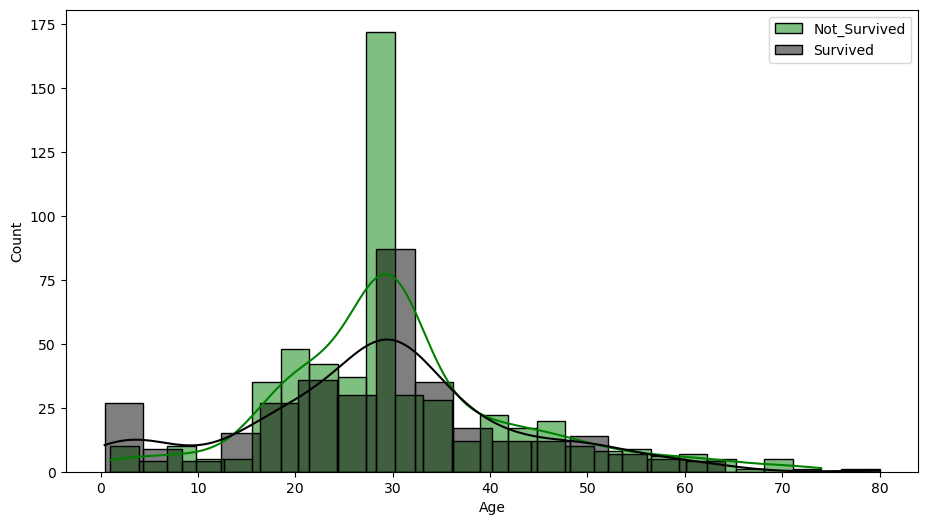

In [35]:
#Survived with age
plt.figure(figsize=(11, 6))
sns.histplot(train[train['Survived'] == 0]['Age'], color='green', label='Not_Survived', kde=True)
sns.histplot(train[train['Survived'] == 1]['Age'], color='black', label='Survived', kde=True)
plt.legend()
plt.show()

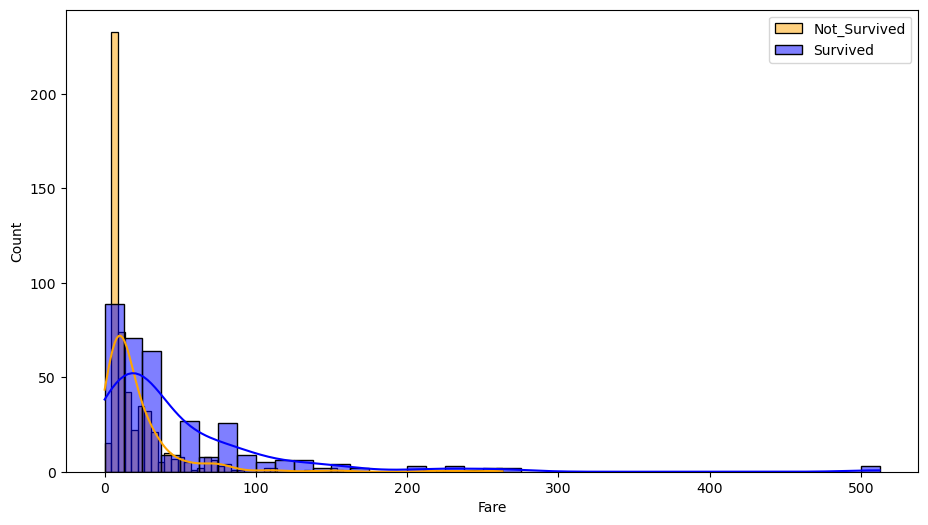

In [36]:
#Survived with Fare
plt.figure(figsize=(11, 6))
sns.histplot(train[train['Survived'] == 0]['Fare'], color='orange', label='Not_Survived', kde=True)
sns.histplot(train[train['Survived'] == 1]['Fare'], color='blue', label='Survived', kde=True)
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


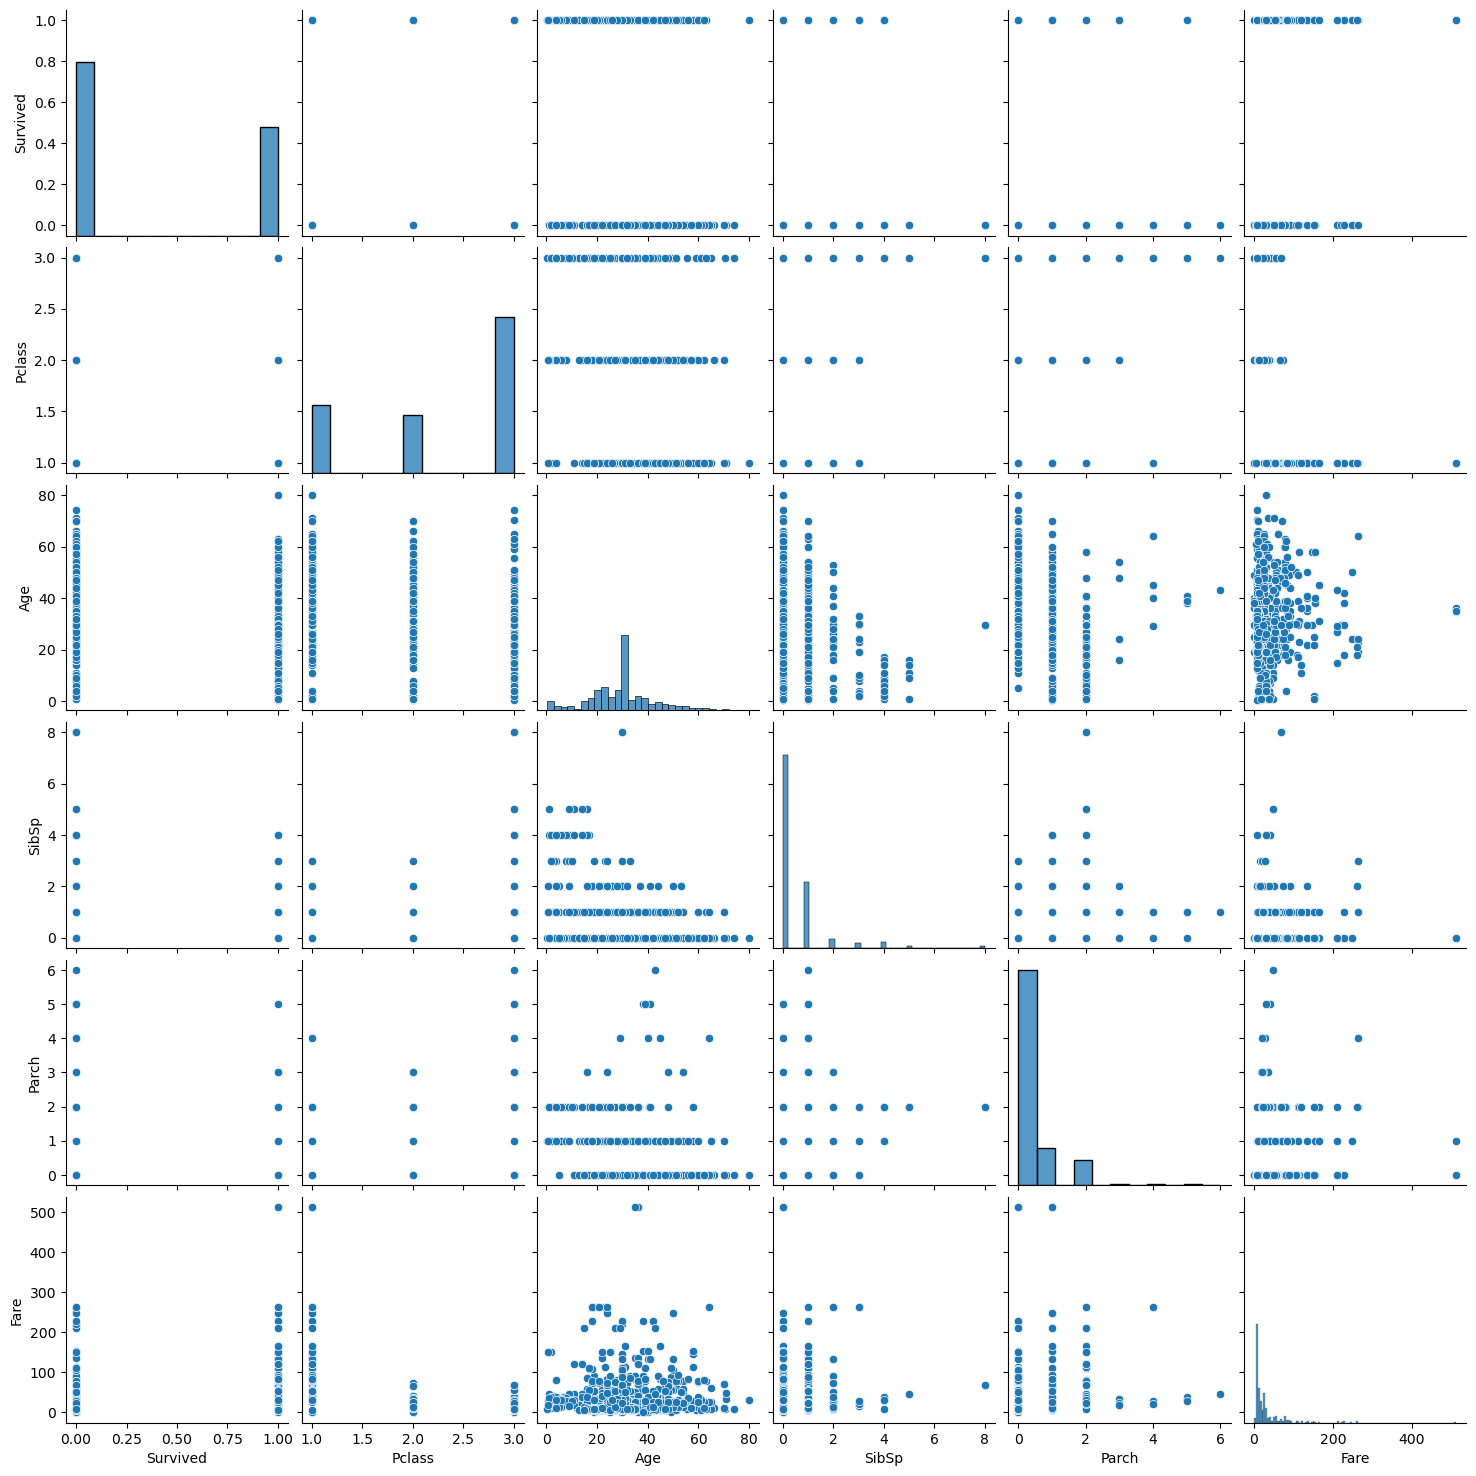

In [37]:
sns.pairplot(train)

/tmp/ipykernel_31/1534458401.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<Axes: >

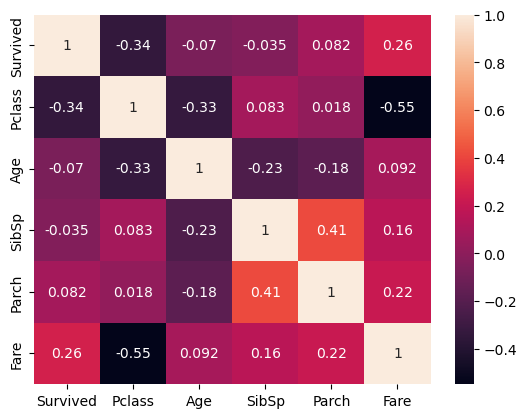

In [38]:
sns.heatmap(train.corr(), annot=True)

# **Conclusion**

**1. Chance of female survival is higher then male survival.**

**2. Travelling in Pclass 3 was deadliest.**

**3. Somehow, people going to C survived more.**

**4. People in the age range 20 to 40 had a higher chance of surviving.**